<a href="https://colab.research.google.com/github/AnishaBalachandran/codsoft_Task2/blob/main/MovieRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/codsoft/IMDb Movies India.csv'

try:
    df = pd.read_csv(file_path, encoding='latin1')
    print(df.head())
except UnicodeDecodeError:
    print("Error ")



                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
# Display the summary information of the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [ ]:
# Display summary statistics for numerical columns
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [ ]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [ ]:
df.shape


(15509, 10)

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(15503, 10)

In [ ]:
from pickle import TRUE
df.drop(columns=['Name','Duration'],axis=1, inplace=True)

In [ ]:
df.shape

(15503, 8)

In [ ]:
mean_rating = round(df['Rating'].mean(),1)
df['Rating'].fillna(mean_rating, inplace=True)

In [ ]:
df['Rating'].isna().sum()

0

In [ ]:
categorical = list(df.columns[df.dtypes == 'object'])

In [ ]:
for i in categorical:
  mode_var = df[i].mode() [0]
  df[i].fillna(mode_var,inplace=True)

In [ ]:
df.isna().sum()

Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),Drama,5.8,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),"Drama, Musical",5.8,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),Drama,5.8,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df['Year']=df['Year'].str.strip('()').astype(int)

In [ ]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,5.8,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,"Drama, Musical",5.8,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,Drama,5.8,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df = df[df['Votes'] != '$5.16M']
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype(int)


<ipython-input-226-166abaaa2cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].str.replace(',','')
<ipython-input-226-166abaaa2cc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].astype(int)


In [ ]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,5.8,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,"Drama, Musical",5.8,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,Drama,5.8,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


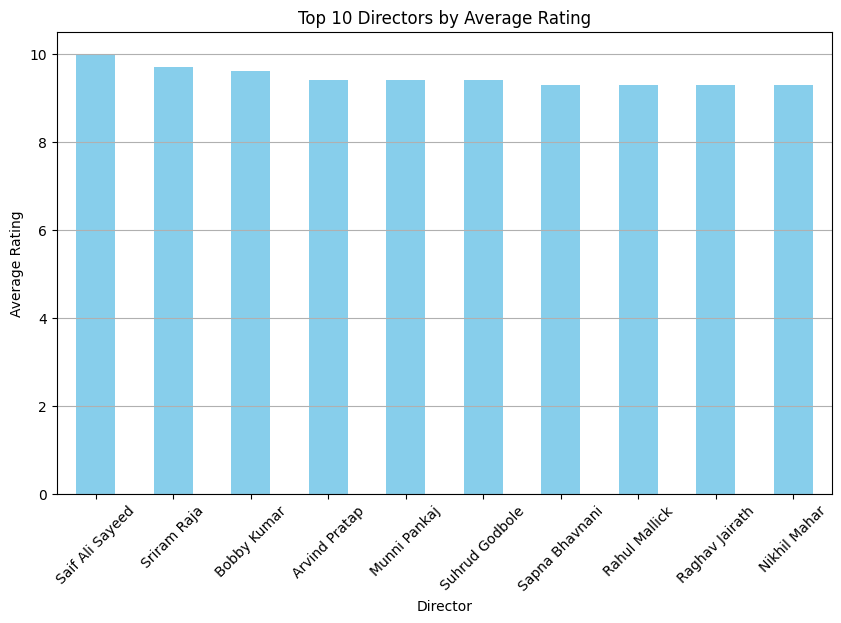

In [ ]:
# Calculate average ratings by Director
avg_ratings_director = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

# Plot bar plot
plt.figure(figsize=(10, 6))
avg_ratings_director.plot(kind='bar', color='skyblue')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-229-c3df328aecb3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Rating', data=df, palette='Set3')


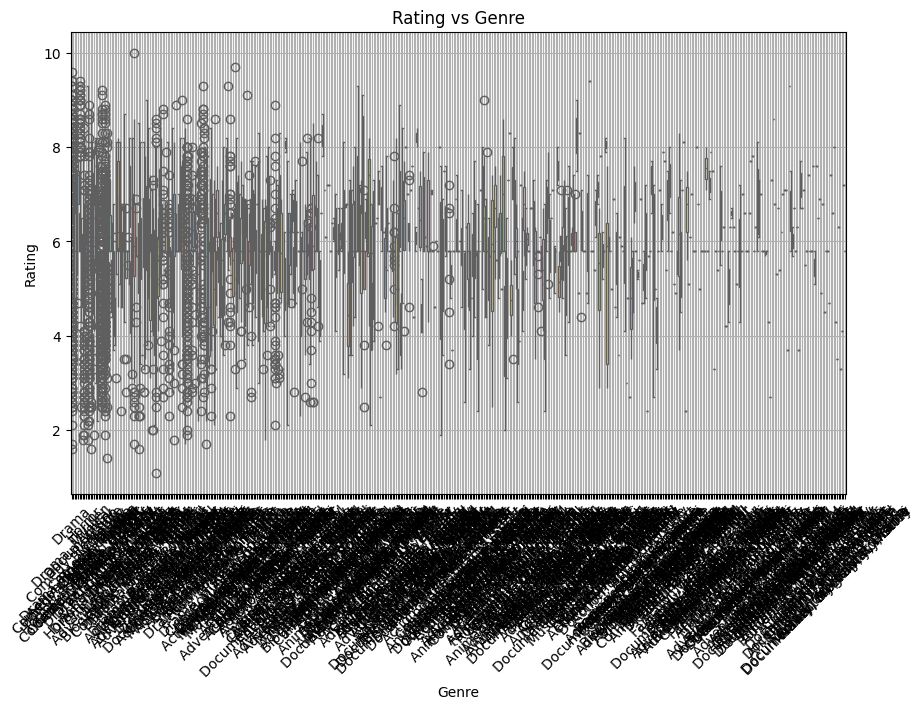

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Rating', data=df, palette='Set3')
plt.title('Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df.nunique()

Year         102
Genre        485
Rating        84
Votes       2033
Director    5938
Actor 1     4717
Actor 2     4891
Actor 3     4820
dtype: int64

In [ ]:
df['Genre_encode'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes_encode'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director_encode'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1_encode'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2_encode'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3_encode'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)


In [ ]:
df.nunique()

Year               102
Rating              84
Genre_encode        55
Votes_encode        74
Director_encode     78
Actor 1_encode      81
Actor 2_encode      81
Actor 3_encode      81
dtype: int64

In [ ]:
df.head()

,Year,Rating,Genre_encode,Votes_encode,Director_encode,Actor 1_encode,Actor 2_encode,Actor 3_encode
0,2019,5.8,5.9,5.8,5.8,5.8,5.5,5.8
1,2019,7.0,5.9,5.8,7.0,6.8,7.0,7.0
2,2021,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,5.8,5.9,5.8,6.3,6.8,5.8,5.5


In [ ]:
X = df.drop(columns='Rating')
Y =df[['Rating']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20,random_state=21)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dct = {
    'Linear':LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    'SVR':SVR()
}

In [ ]:
dct.items()

dict_items([('Linear', LinearRegression()), ('RandomForest', RandomForestRegressor()), ('SVR', SVR())])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
train_cv = []

for name,model in dct.items():
    # fit the model
    m = model.fit(xtrain,ytrain)
    ypred_train = m.predict(xtrain)
    ypred_test = m.predict(xtest)
    # calculate MSE
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    # caluclate R2
    r2_train = (r2_score(ytrain,ypred_train))*100
    r2_test = (r2_score(ytest,ypred_test))*100
    # calculate cross validated scores
    cv = cross_val_score(m,xtrain,ytrain,cv=5,scoring='r2')
    scores = (cv.mean())*100

    # add these values to the respective list to compare the output
    train_mse.append(mse_train)
    train_r2.append(r2_train)
    test_mse.append(mse_test)
    test_r2.append(r2_test)
    train_cv.append(scores)

    # print the results
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print(f'CV:{train_cv}')


Scores for Linear
Training Scores
MSE:[0.2452786222237034]
R2:[74.82228016282096]
Testing Scores
MSE:[0.24924390385174722]
R2:[74.60525333248165]
CV:[74.76495725788406]


<ipython-input-240-f511af00e094>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m = model.fit(xtrain,ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Scores for RandomForest
Training Scores
MSE:[0.2452786222237034, 0.028050192902087184]
R2:[74.82228016282096, 97.12066264941971]
Testing Scores
MSE:[0.24924390385174722, 0.20239078288918091]
R2:[74.60525333248165, 79.37898347809309]
CV:[74.76495725788406, 80.06478646965466]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Scores for SVR
Training Scores
MSE:[0.2452786222237034, 0.028050192902087184, 0.9706366185785643]
R2:[74.82228016282096, 97.12066264941971, 0.3646684545172585]
Testing Scores
MSE:[0.24924390385174722, 0.20239078288918091, 0.9791057107624459]
R2:[74.60525333248165, 79.37898347809309, 0.24172667299319217]
CV:[74.76495725788406, 80.06478646965466, 0.16718847535996284]


In [ ]:
res = {'Name':list(dct.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,
       'CV Training Scores':train_cv}

In [ ]:
df_res = pd.DataFrame(res)
df_res.sort_values('CV Training Scores',ascending=False)

,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores,CV Training Scores
1,RandomForest,0.028050,0.202391,97.120663,79.378983,80.064786
0,Linear,0.245279,0.249244,74.822280,74.605253,74.764957
2,SVR,0.970637,0.979106,0.364668,0.241727,0.167188
